Accuracy: 0.571625344352617
Confusion Matrix:
 [[199 168]
 [143 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56       367
           1       0.56      0.60      0.58       359

    accuracy                           0.57       726
   macro avg       0.57      0.57      0.57       726
weighted avg       0.57      0.57      0.57       726



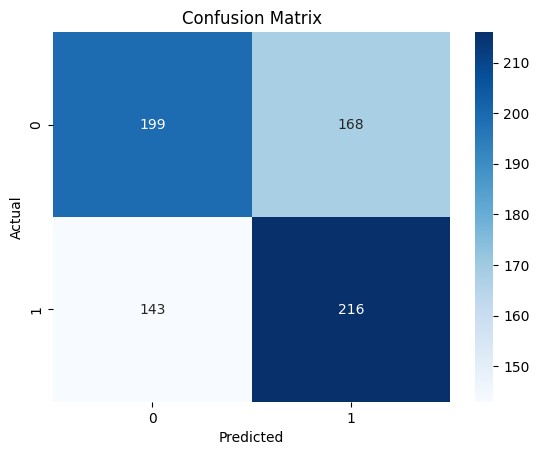

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#load data from csv
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
# Rename the 'Temp' column to 'Close'
data = data.rename(columns={'Temp': 'Close'}) # The original DataFrame has a column named 'Temp' not 'Close'. Renaming it to 'Close'
data = data[['Close']]


# Create indicators
data['Return'] = data['Close'].pct_change()
data['Lag_1'] = data['Close'].shift(1)
data['MA_3'] = data['Close'].rolling(window=3).mean()
data['MA_7'] = data['Close'].rolling(window=7).mean()
data['Volatility'] = data['Return'].rolling(window=7).std()

# Create target: 1 if next day's price is higher
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Drop NaNs
data = data.dropna()

X = data[['Lag_1', 'MA_3', 'MA_7', 'Volatility']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
